# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [78]:
# Import your libraries
import pandas as pd
import numpy as np
import sqlalchemy
import random
import matplotlib.pyplot as plt
from scipy import stats

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [79]:
# Your code here
mean = 50
standard_deviation = 5
sample_size = [10, 50, 500, 5000]
s = [np.random.normal(mean, standard_deviation, i) for i in sample_size]

#### Interpret the normaltest results and make your observations.

In [87]:
# Explain the test results here
pts = 1000
np.random.seed(i)
a = np.random.normal(0, 1, size=pts)
b = np.random.normal(2, 1, size=pts)
x = np.concatenate((a, b))
k2, p = stats.normaltest(x)
alpha = 1e-3
print("p = {:g}".format(p))
p = 3.27207e-11
if p < alpha:
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 1.05516e-06
The null hypothesis can be rejected


#### Step 2: Plot normal distributions

Use matplotlib to plot a histogram of each sample. 

*Hints:*

- Your outputs should look like below:

![normal distributions with different sample sizes](ch-1.png)

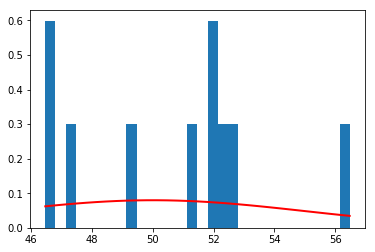

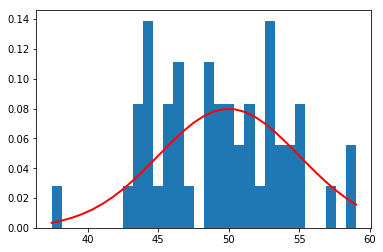

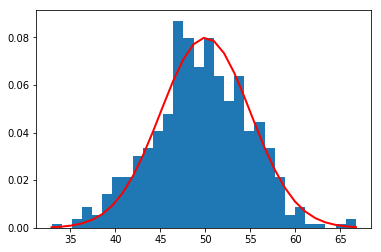

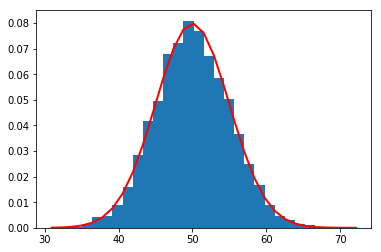

In [76]:
# Your code here
for i in range(4):
    count, bins, ignored = plt.hist(s[i], 30, density=True)
    plt.plot(bins, 1/(standard_deviation * np.sqrt(2 * np.pi)) * np.exp( - (bins - mean)**2 / (2 * standard_deviation**2) ), linewidth=2, color='r')
    plt.show()


#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

In [85]:
# Your comment and explanation here
# The bigger the sample, the more it approaches to a Normal Distribution.

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

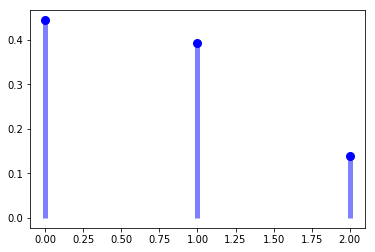

In [108]:
# Your code here
from scipy.stats import binom
fig, ax = plt.subplots(1, 1)
n, p = 5, 0.15
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')

x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

#### Explain what you observe from the plot above

In [ ]:
# Your comment here
# As the probability of clicking the Ad is so low (0.15), and the sample is so small (5),
# it's obvious that most of the times no one or just one person will click it
# Then there's a small chance two people click it and almost no chance more than two do so

#### Now plot PMP with 50, 500, and 5000 visitors.

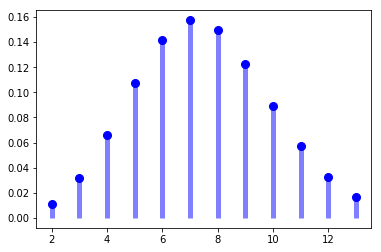

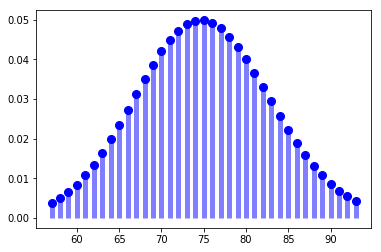

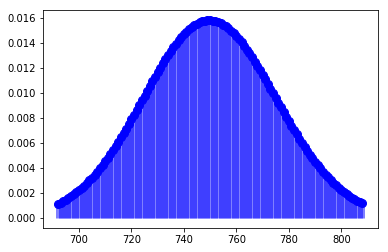

In [112]:
# Your code here

for i in range(3):

    fig, ax = plt.subplots(1, 1)
    n = [50, 500, 5000]
    p = 0.15
    mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')

    x = np.arange(binom.ppf(0.01, n[i], p), binom.ppf(0.99, n[i], p))
    ax.plot(x, binom.pmf(x, n[i], p), 'bo', ms=8, label='binom pmf')
    ax.vlines(x, 0, binom.pmf(x, n[i], p), colors='b', lw=5, alpha=0.5)

#### What did you notice from the distribution plots? Comment your findings.

In [ ]:
# Your comment here


# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

In [ ]:
# Your comment here
# It measures the probabilities of an event to occur certain times during a given period

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [163]:
# Your code here
poisson.pmf(320, 300)

0.011612348610402475

#### What is the probability of getting 60 visits?

In [159]:
# Your code here
poisson.pmf(60, 300)

2.622743762294515e-64

# Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

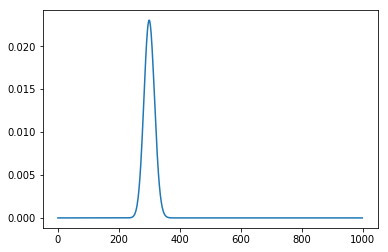

In [195]:
# your code here


import math

t = np.arange(1000)
x = poisson(300)
arr = []

for n in t:
    arr.append(x.pmf(n))
plt.plot(arr)


# Challenge 4 - Central Limit Theorem

#### Example of application

A delivery company needs 35 minutes to deliver a package, with a standard deviation of 8 minutes. Suppose that in one day, they deliver 200 packages.

#### a. What is the probability that the mean delivery time today is between 30 and 35 minutes?

(array([1.26000e+02, 3.16600e+03, 3.48690e+04, 1.64881e+05, 3.42218e+05,
        3.10125e+05, 1.22230e+05, 2.07960e+04, 1.54700e+03, 4.20000e+01]),
 array([-4.60490614, -3.6611409 , -2.71737565, -1.77361041, -0.82984517,
         0.11392008,  1.05768532,  2.00145056,  2.94521581,  3.88898105,
         4.83274629]),
 <a list of 10 Patch objects>)

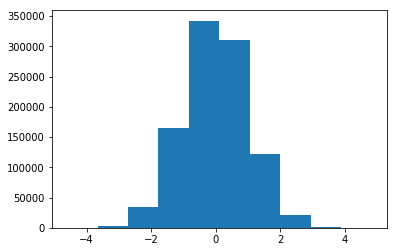

In [207]:
# Your answer here
from numpy import random
y = random.normal(size=1000000)
plt.hist(y)

#### b. What is the probablity that in total, it takes more than 115 hours to deliver all 200 packages?

In [ ]:
# Your answer here